In [1]:
# ==================================================================================================
# AVEC FEATURE ENGINEERING !
# ==================================================================================================

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set it to your desired number of threads
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [3]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
url_df_data               = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\flipkart_com-ecommerce_sample_1050.csv"
df_data = pd.read_csv(url_df_data)

print("Datasets loaded succesfully ! :D")

Datasets loaded succesfully ! :D


In [4]:
df_data.sample(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
952,5be86e35f21b1514d0e7742893d6cfba,2016-01-01 13:15:34 +0000,http://www.flipkart.com/unnati-abstract-single...,Unnati Abstract Single Top Sheet Multicolor,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEFHQ3HZPRCD8Z,1797.0,520.0,5be86e35f21b1514d0e7742893d6cfba.jpg,False,Unnati Abstract Single Top Sheet Multicolor\r\...,No rating available,No rating available,Unnati,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
342,17a73d7c4b02ada2bfeed1115fed08a4,2015-12-01 06:13:00 +0000,http://www.flipkart.com/envy-1000-force-combo-...,Envy-1000 Force Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE79CEHJZX52XS,360.0,329.0,17a73d7c4b02ada2bfeed1115fed08a4.jpg,False,Flipkart.com: Buy Envy-1000 Force Combo Set on...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
914,762b6b22cccf91935e92446efe298fe3,2016-04-02 19:26:28 +0000,http://www.flipkart.com/612-league-baby-boy-s-...,612 League Baby Boy's Checkered Casual Shirt,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",SHTEFGCEGSYJT3MN,545.0,381.0,762b6b22cccf91935e92446efe298fe3.jpg,True,Specifications of 612 League Baby Boy's Checke...,No rating available,No rating available,612 League,"{""product_specification""=>[{""key""=>""Pattern"", ..."
44,8050d31bffe6827c804b8222338aafb2,2016-03-20 14:44:44 +0000,http://www.flipkart.com/akup-i-loves-music-cer...,AKUP i-loves-music Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> AKUP Coff...",MUGEGZUHVZ4Y85DV,500.0,259.0,8050d31bffe6827c804b8222338aafb2.jpg,False,Key Features of AKUP i-loves-music Ceramic Mug...,No rating available,No rating available,AKUP,"{""product_specification""=>[{""key""=>""Type"", ""va..."
76,1971dcd2f3058a4c87bdd7d87d4baeba,2016-03-17 12:56:51 +0000,http://www.flipkart.com/ke-gift-box-stor-jewel...,KE GIFT BOX STOR JEWELLARY Vanity Jewellery,"[""Beauty and Personal Care >> Makeup >> Vanity...",VANEGDV8HEGKHDAQ,400.0,360.0,1971dcd2f3058a4c87bdd7d87d4baeba.jpg,False,Specifications of KE GIFT BOX STOR JEWELLARY V...,No rating available,No rating available,KE,"{""product_specification""=>[{""value""=>""GIFT BOX..."
627,e47b9f88b773b3fd97ab3b51642ff6fb,2016-06-23 23:50:58 +0000,http://www.flipkart.com/sarah-stylish-hair-cla...,Sarah Stylish Hair Claw,"[""Beauty and Personal Care >> Hair Care >> Hai...",HACEJUHDM5MTPKYW,245.0,245.0,e47b9f88b773b3fd97ab3b51642ff6fb.jpg,False,Specifications of Sarah Stylish Hair Claw (Bro...,No rating available,No rating available,Sarah,"{""product_specification""=>[{""key""=>""Material"",..."
387,36b965559aa2b97cb961a603f18a9183,2015-12-01 06:13:00 +0000,http://www.flipkart.com/fogg-dynamic-magnetic-...,"Fogg Dynamic,Magnetic Combo Set","[""Beauty and Personal Care >> Fragrances >> De...",CAGEBTGGUDAHNG8D,398.0,360.0,36b965559aa2b97cb961a603f18a9183.jpg,False,"Flipkart.com: Buy Fogg Dynamic,Magnetic Combo ...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
61,95330f6f0f44d17b918feec36bedcdef,2016-06-02 08:05:27 +0000,http://www.flipkart.com/rythmx-fb-nail-polishe...,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,"[""Beauty and Personal Care >> Combos and Kits ...",CBKEJ3AZYYJTEHK6,1500.0,399.0,95330f6f0f44d17b918feec36bedcdef.jpg,False,Specifications of RYTHMX FB NAIL POLISHES BLAC...,No rating available,No rating available,RYTHMX,"{""product_specification""=>[{""key""=>""Number of ..."
106,184ecf07ca4e2872eaf53d2344a1e783,2016-01-01 10:55:30 +0000,http://www.flipkart.com/bestway-1-47m-x-1-22m-...,Bestway 1.47m x 1.47m x 1.22m/Play With Sun Sh...,"[""Baby Care >> Furniture & Furnishings >> Infl...",IFPEEANZ88AYFQJJ,2999.0,2499.0,184ecf07ca4e2872eaf53d2344a1e783.jpg,False,Buy Bestway 1.47m x 1.47m x 1.22m/Play With Su...,No rating available,No

# 0. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

D:\ANACONDA\envs\OC_PROJECT6_WITH_TENSORFLOW\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\envs\OC_PROJECT6_WITH_TENSORFLOW\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


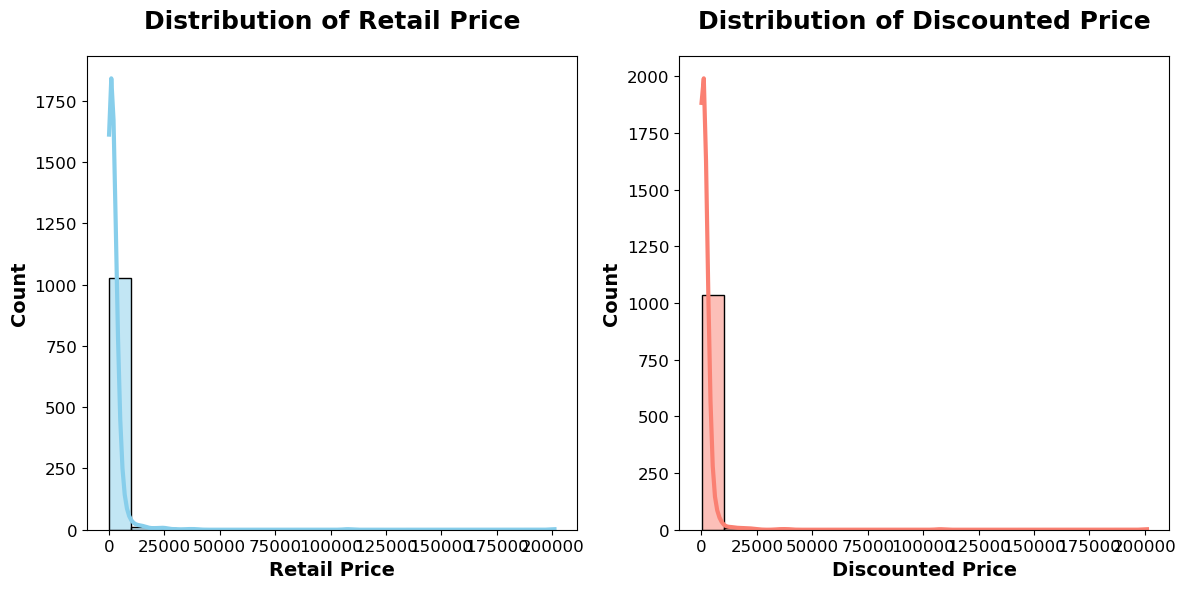

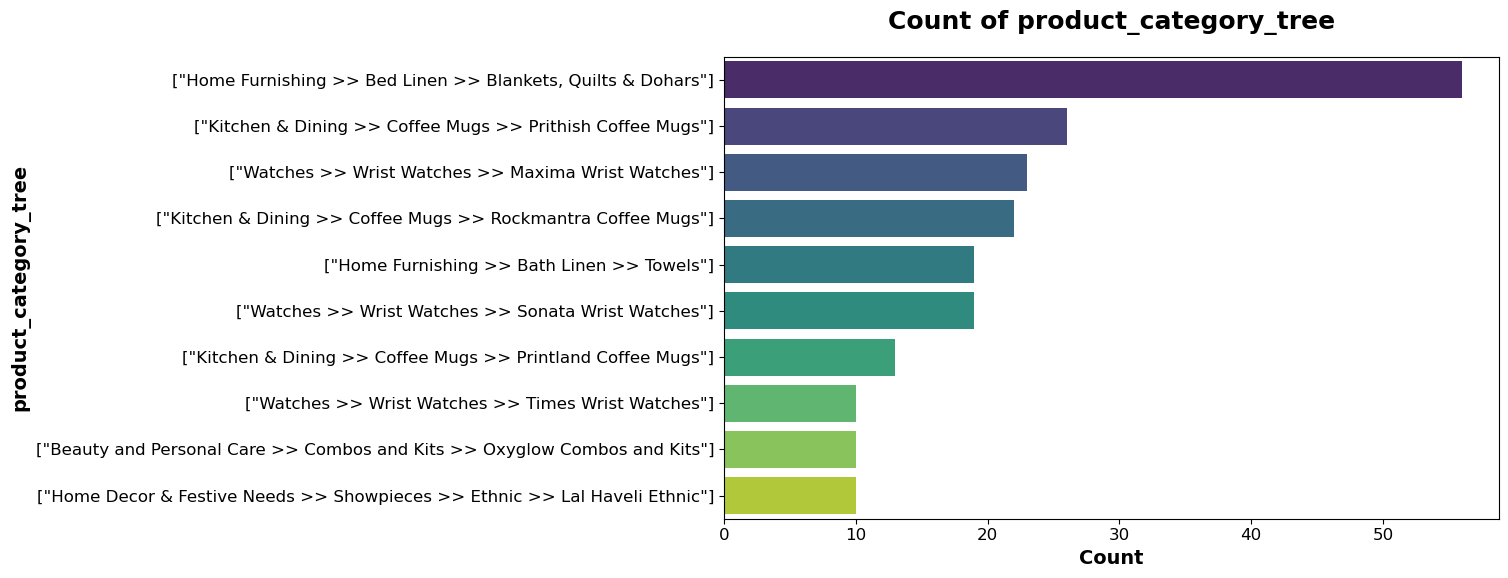

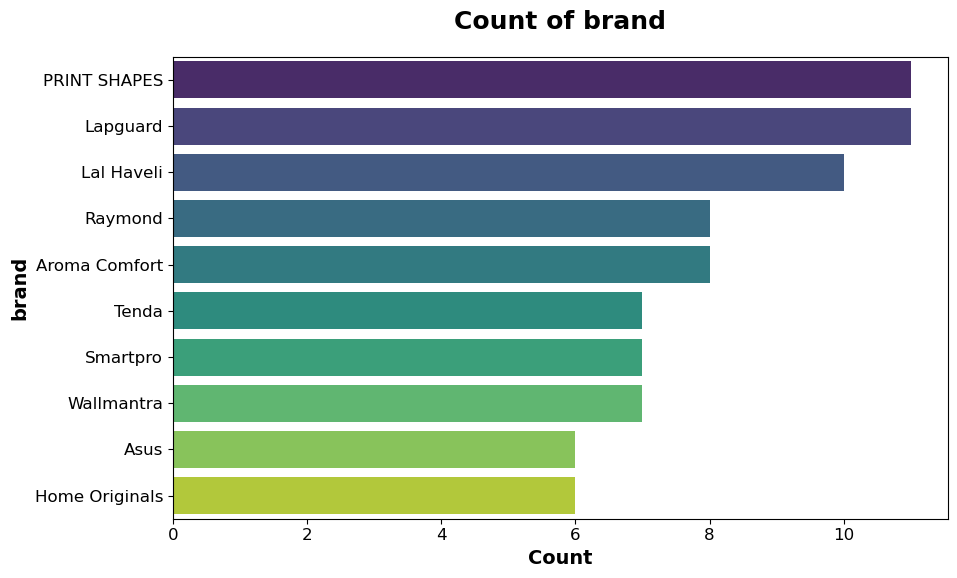

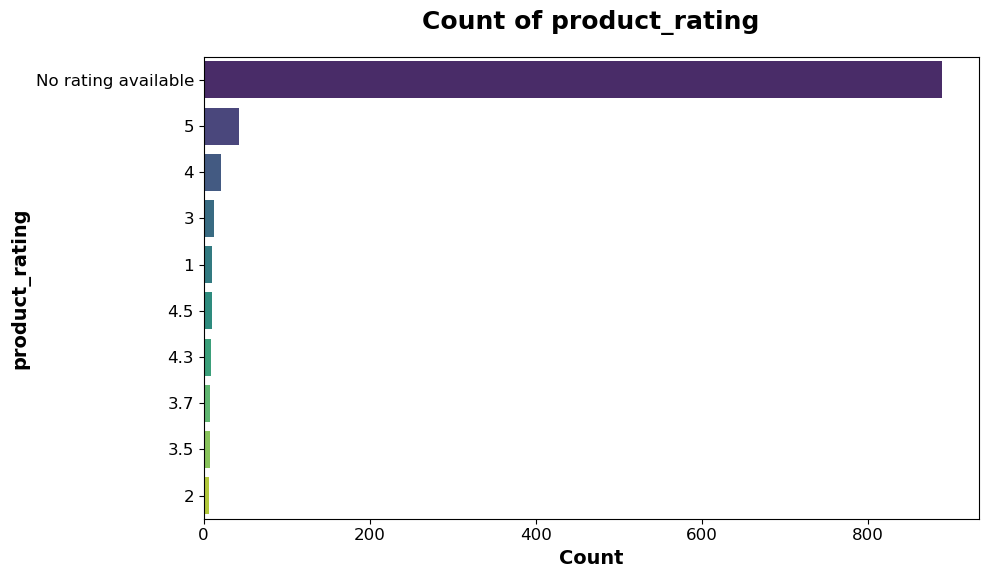

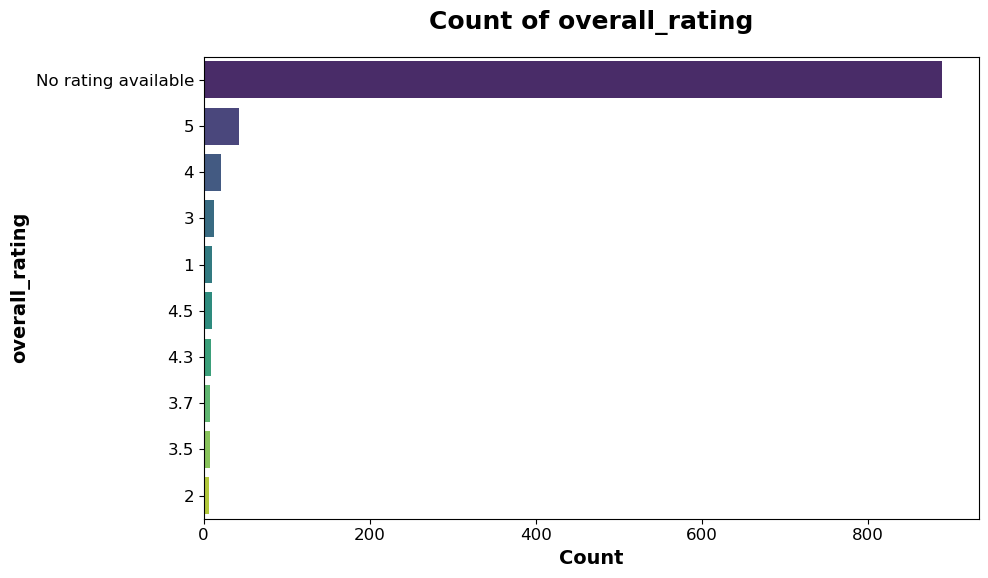

In [5]:
# Display basic information about the dataset
print(df_data.info())

# Check for missing values
print("\n\nMissing Values:")
print(df_data.isna().sum())

# Summary statistics for numerical features
print("\n\nSummary Statistics for Numerical Features:")
print(df_data.describe())

# Explore the distributions of numerical features (retail_price and discounted_price)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_data['retail_price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Retail Price')
plt.xlabel('Retail Price')

plt.subplot(1, 2, 2)
sns.histplot(df_data['discounted_price'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Discounted Price')
plt.xlabel('Discounted Price')

plt.tight_layout()
plt.show()

# Analyze categorical features
categorical_features = ['product_category_tree', 'brand', 'product_rating', 'overall_rating']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=df_data, order=df_data[feature].value_counts().index[:10], palette='viridis')
    plt.title(f'Count of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

## 0.1. Display

In [6]:
df_data.shape

(1050, 15)

In [7]:
df_data.describe()

,retail_price,discounted_price
count,1049.00,1049.00
mean,2186.20,1584.53
std,7639.23,7475.10
min,35.00,35.00
25%,555.00,340.00
50%,999.00,600.00
75%,1999.00,1199.00
max,201000.00,201000.00


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [9]:
df_data.dtypes.value_counts()

object     12
float64     2
bool        1
Name: count, dtype: int64

In [10]:
df_data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

## 0.2. Valeurs Manquantes ou dupliquées

In [11]:
df_data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [12]:
# Remove rows where 'product_specifications' is null
print("Nombre de lignes avant la suppression :", df_data.shape[0])
df_data = df_data.dropna(subset=['product_specifications'])
print("Nombre de lignes après la suppression :", df_data.shape[0])
df_data.reset_index(drop=True, inplace=True)


Nombre de lignes avant la suppression : 1050
Nombre de lignes après la suppression : 1049


<Axes: >

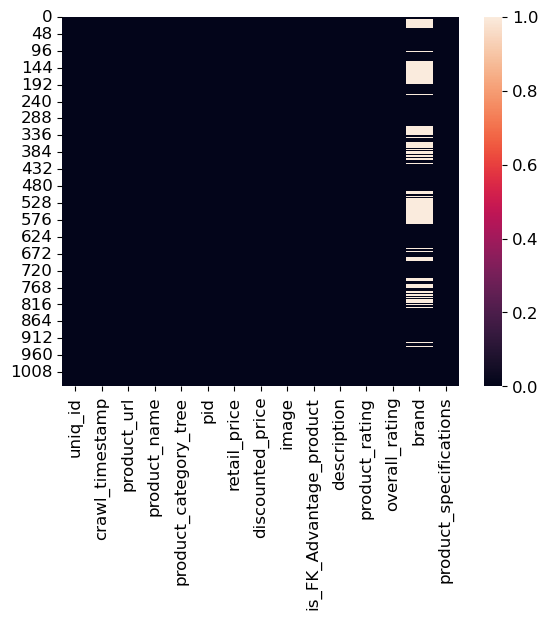

In [13]:
sns.heatmap(df_data.isna())

In [14]:
df_data.duplicated().sum()

0

In [15]:
for col in df_data.columns:
    n=df_data.duplicated(subset=col).sum()
    print(f"col: {col} -> duplicated : {n}")

col: uniq_id -> duplicated : 0
col: crawl_timestamp -> duplicated : 901
col: product_url -> duplicated : 0
col: product_name -> duplicated : 0
col: product_category_tree -> duplicated : 408
col: pid -> duplicated : 0
col: retail_price -> duplicated : 694
col: discounted_price -> duplicated : 624
col: image -> duplicated : 0
col: is_FK_Advantage_product -> duplicated : 1047
col: description -> duplicated : 0
col: product_rating -> duplicated : 1022
col: overall_rating -> duplicated : 1022
col: brand -> duplicated : 559
col: product_specifications -> duplicated : 65


In [16]:
## 0.3. Data Inspection

In [17]:
df_data.describe(include=object)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,711,1049
unique,1049,148,1049,1049,641,1049,1049,1049,27,27,489,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Lapguard,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,888,888,11,22


## 0.3. Feature Engineering

### O.3.1. CATEGORIES - TOP, SECONDARY, TERTIARY

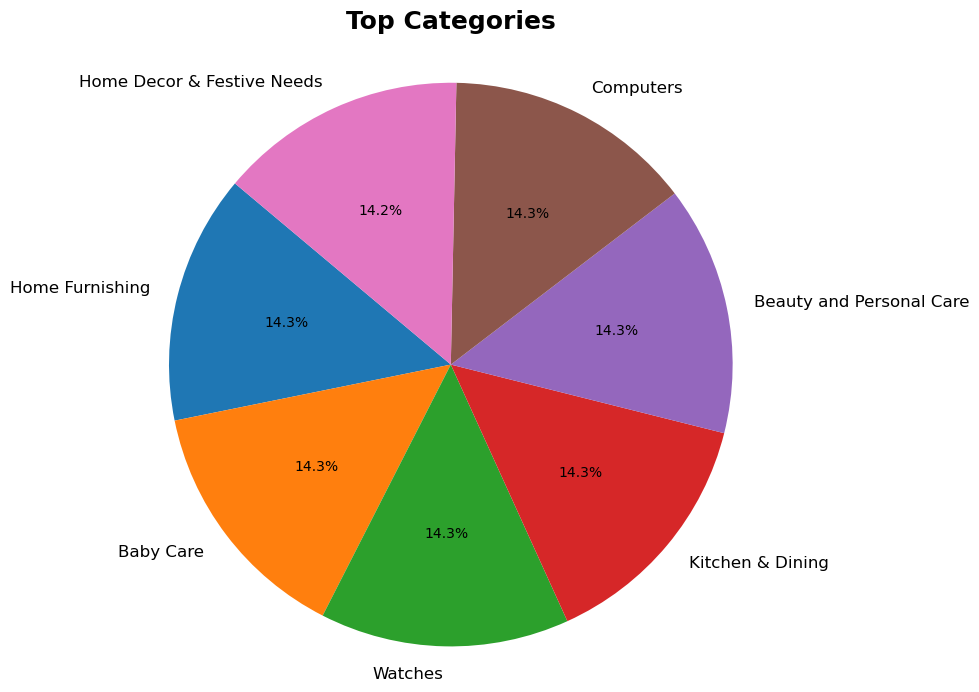

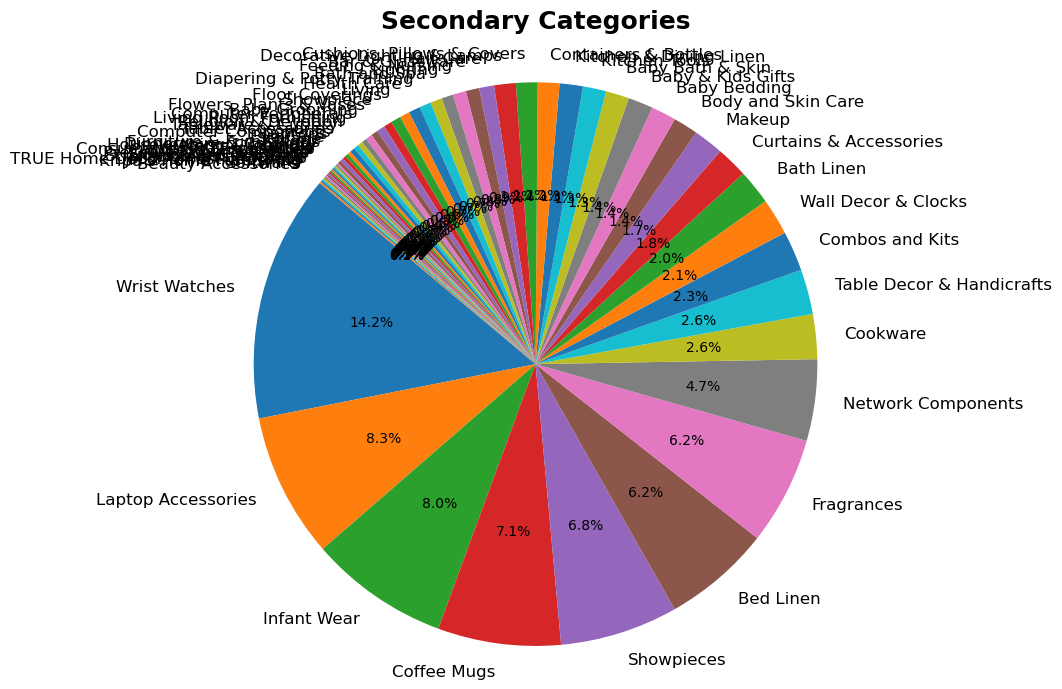

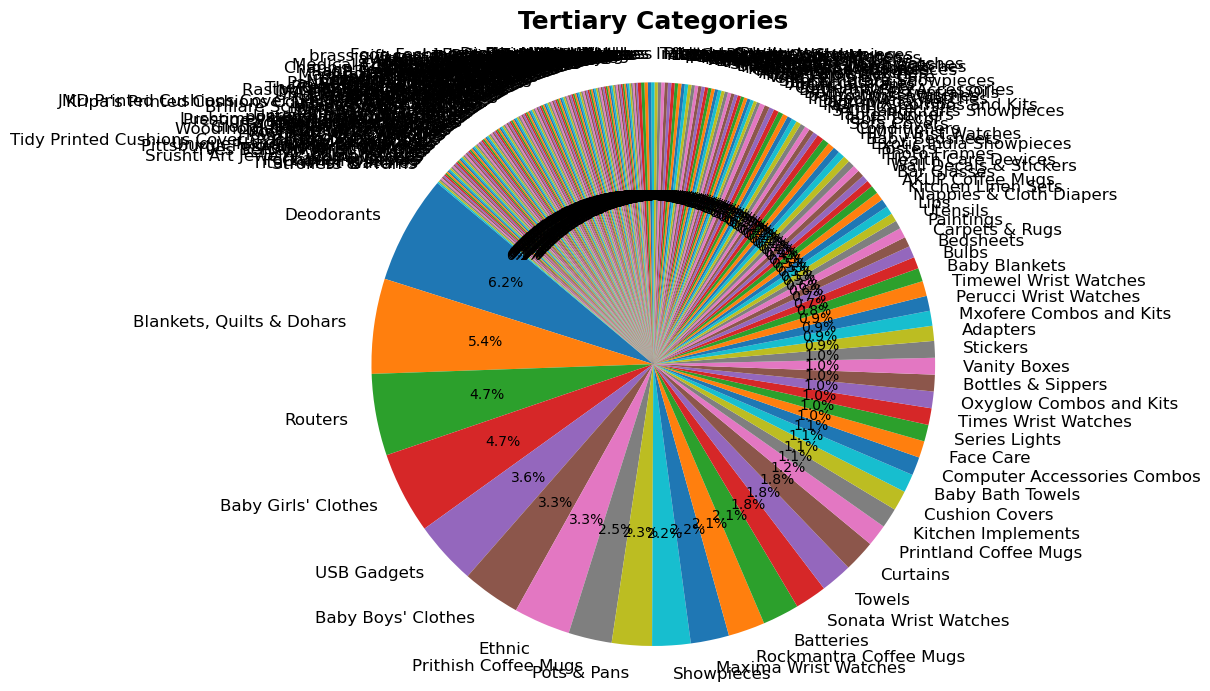

Number of unique top categories: 7
Number of unique secondary categories: 62
Number of unique tertiary categories: 240


In [18]:
# ==================================================================================================
# TOP, SECONDARY and TERTIARY CATEGORIES
# ==================================================================================================
# Function to extract top, secondary, and tertiary categories
def extract_categories(category_tree):
    # Split the category tree string and get categories
    categories = category_tree.strip('[]').split(">>")
    
    # Extract top category
    top_category = categories[0].strip().replace('"', '')
    
    # Extract secondary category if available
    secondary_category = categories[1].strip().replace('"', '') if len(categories) > 1 else None
    
    # Extract tertiary category if available
    tertiary_category = categories[2].strip().replace('"', '') if len(categories) > 2 else None
    
    return top_category, secondary_category, tertiary_category

# Apply the function to each row in the DataFrame
df_data['top_category'], df_data['secondary_category'], df_data['tertiary_category'] = zip(*df_data['product_category_tree'].apply(extract_categories))

# Extract unique categories
unique_top_categories = df_data['top_category'].unique()
unique_secondary_categories = df_data['secondary_category'].unique()
unique_tertiary_categories = df_data['tertiary_category'].unique()

# Function to plot pie chart for category distribution
def plot_category_pie_chart(categories, title):
    # Count the frequency of each category
    category_counts = categories.value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie chart for top categories
plot_category_pie_chart(df_data['top_category'], 'Top Categories')

# Plot pie chart for secondary categories
plot_category_pie_chart(df_data['secondary_category'], 'Secondary Categories')

# Plot pie chart for tertiary categories
plot_category_pie_chart(df_data['tertiary_category'], 'Tertiary Categories')



# ==================================================================================================
# COUNT NUMBER OF CATEGORY IN TOP, SECONDARY and TERTIARY
# ==================================================================================================
# Extract unique categories
nunique_top_categories = df_data['top_category'].nunique()
nunique_secondary_categories = df_data['secondary_category'].nunique()
nunique_tertiary_categories = df_data['tertiary_category'].nunique()

print("Number of unique top categories:", nunique_top_categories)
print("Number of unique secondary categories:", nunique_secondary_categories)
print("Number of unique tertiary categories:", nunique_tertiary_categories)

In [19]:
# IMPTUE TERTIARY CATEGORY
df_data['tertiary_category'].fillna("NO TERTIARY CATEGORY", inplace=True)

### 0.3.2. TEST - COncatenation information dans la description

In [20]:
# # Fill missing values with empty strings
# df_data['product_name'] = df_data['product_name'].fillna('')
# df_data['brand'] = df_data['brand'].fillna('')

# # Concatenate 'product_name', 'brand', and 'description' columns
# df_data['description'] = df_data.apply(lambda row: row['product_name'] + '|||' + row['brand'] + '|||' + row['description'], axis=1)

# # Display the modified 'description' column
# display(df_data['description'])

# I. Etudier la faisabilité de classification en utilisant des méthodes NLP basiques

## I.1. Prétraitement de textes (nettoyage, stemming et lemmatization)

In [21]:
# Set pandas display options to show more characters per column
pd.set_option('display.max_colwidth', None)

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# ==================================================================================================
# PRE-TREATMENT OF THE DESCRIPTION TEXT : CLEANING, STEMMING and LEMMATIZATION. 
# ==================================================================================================
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove punctuation and symbols using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Eliminate tokens with less than 4 letters
    tokens = [word for word in tokens if len(word) >= 3]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# ==================================================================================================
# TEST - TO SEE EVOLUTION OF THE EXAMPLE
# ==================================================================================================
def preprocess_text_TEST(text):
    # Remove punctuation and symbols using regular expressions
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    print("After removing punctuation and symbols:", text)
    
    # Tokenization
    tokens = word_tokenize(text)
    print("After tokenization:", tokens)
    
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    print("After lowercasing:", tokens)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    print("After removing stopwords:", tokens)
    
    # Eliminate tokens with less than 3 letters
    tokens = [word for word in tokens if len(word) >= 3]
    print("After eliminating tokens with less than 3 letters:", tokens)
    
    # Stemming
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(word) for word in tokens]
    # print("After stemming:", tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    print("After lemmatization:", tokens)
    
    return " ".join(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Olivi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# ==================================================================================================
# EXEMPLE D APPLICATION 
# ==================================================================================================
# Example English sentence
example_sentence = "We have been gratified by the popularity of the first edition of The Elements of Statistical Learning. This, along with the fast pace of research in the statistical learning field, motivated us to update our book with a second edition. We have added four new chapters and updated some of the existing chapters. Because many readers are familiar with the layout of the first edition, we have tried to change it as little as possible. Here is a summary of the main changes:"
# example_sentence = "The quick brown fox jumps over the lazy dog."

# Preprocess the example sentence
clean_example_sentence = preprocess_text(example_sentence)

# Display the cleaned sentence
print("Original sentence:")
print(example_sentence)
print("\nCleaned sentence:")
print(clean_example_sentence)
print("\n\n")

clean_example_sentence = preprocess_text_TEST(example_sentence)


Original sentence:
We have been gratified by the popularity of the first edition of The Elements of Statistical Learning. This, along with the fast pace of research in the statistical learning field, motivated us to update our book with a second edition. We have added four new chapters and updated some of the existing chapters. Because many readers are familiar with the layout of the first edition, we have tried to change it as little as possible. Here is a summary of the main changes:

Cleaned sentence:
gratifi popular first edit element statist learn along fast pace research statist learn field motiv updat book second edit ad four new chapter updat exist chapter mani reader familiar layout first edit tri chang littl possibl summari main chang



After removing punctuation and symbols: We have been gratified by the popularity of the first edition of The Elements of Statistical Learning  This  along with the fast pace of research in the statistical learning field  motivated us to updat

In [24]:
# ==================================================================================================
# PRE-TREATMENT OF THE DESCRIPTION TEXT : CLEANING, STEMMING and LEMMATIZATION. 
# ==================================================================================================
# Apply preprocessing to the description column
df_data['clean_description'] = df_data['description'].apply(preprocess_text)

# Check the cleaned text
display(df_data['clean_description'].head())


0    key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price curtain enhanc look interior curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length box number content sale packag pack sale packag curtain bodi design materi polyest
1                             

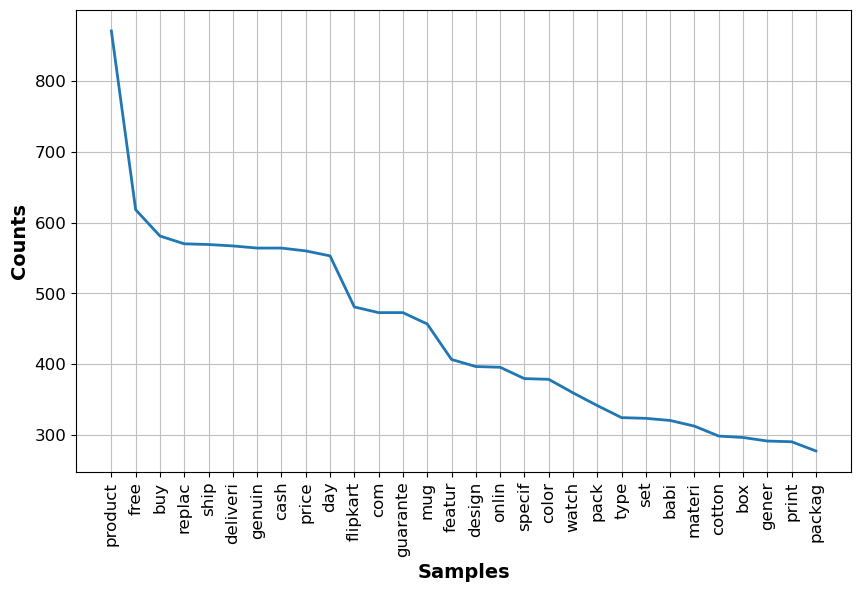

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function for visualization of word frequency
def visualize_word_frequency(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Create a frequency distribution of tokens
    freq_dist = nltk.FreqDist(tokens)
    # Plot the frequency distribution
    plt.figure(figsize=(10, 6))
    freq_dist.plot(30, cumulative=False)

# Visualize the word frequency distribution of the cleaned text
visualize_word_frequency(df_data['clean_description'].str.cat(sep=' '))

## I.2. Encodage de texte (Bag of Words OU TF-IDF)

In [26]:
# ==================================================================================================
# TEXT ENCODING - Bag of Words
# Bag of Words (BoW) is a simple yet effective method for encoding text data. It represents text 
# documents as numerical feature vectors by counting the frequency of each word in the document.
# ==================================================================================================
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
X_bow = count_vectorizer.fit_transform(df_data['clean_description'])

# Check the shape of the encoded data
print("Shape of encoded data (Bag of Words):", X_bow.shape)


Shape of encoded data (Bag of Words): (1049, 3915)


In [27]:
# ==================================================================================================
# TEXT ENCODING - Bag of Ngrams
# Bag of Ngram is a text encoding method that represents documents by counting the frequency 
# of consecutive pairs of words (bigrams) present in the text.
# ==================================================================================================
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with bigram range
count_vectorizer_Ngram = CountVectorizer(ngram_range=(2, 2))  # Using bigrams
X_bo2gram = count_vectorizer_Ngram.fit_transform(df_data['clean_description']) # Fit and transform the preprocessed text data

count_vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))  # Using trigrams
X_bo3gram = count_vectorizer_trigram.fit_transform(df_data['clean_description'])

count_vectorizer_fourgram = CountVectorizer(ngram_range=(4, 4))  # Using four-grams
X_bo4gram = count_vectorizer_fourgram.fit_transform(df_data['clean_description'])

# Check the shape of the encoded data
print("Shape of encoded data (Bigram Bag of Words):", X_bo2gram.shape)
print("Shape of encoded data (Trigram Bag of Words):", X_bo3gram.shape)
print("Shape of encoded data (Quadrigram Bag of Words):", X_bo4gram.shape)




Shape of encoded data (Bigram Bag of Words): (1049, 17493)
Shape of encoded data (Trigram Bag of Words): (1049, 22756)
Shape of encoded data (Quadrigram Bag of Words): (1049, 25227)


In [28]:
# ==================================================================================================
# TEXT ENCODING - TF-IDF (Term Frequency-Inverse Document Frequency).
# TF-IDF is another popular method for encoding text data, which takes into account not only the 
# frequency of words in a document but also their importance in the entire corpus.
# ==================================================================================================
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(df_data['clean_description'])

# Check the shape of the encoded data
print("Shape of encoded data (TF-IDF):", X_tfidf.shape)



Shape of encoded data (TF-IDF): (1049, 3915)


## I.5. BOW - Réduction dimensionnelle (T-SNE) et comparaison avec les catégories réelles

In [29]:
# ==================================================================================================
# TEXT DIMENSIONALITY REDUCTION - PCA (Principal Component Analysis):
# Reducing the dimensionality of text features using PCA to visualize high-dimensional data in 2D.
# ==================================================================================================
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Create a t-SNE model with 2 components (for 2D visualization)
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the text features
text_features_reduced = tsne.fit_transform(X_bow.toarray())

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import itertools

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
X_bow = count_vectorizer.fit_transform(df_data['clean_description'])

# ==================================================================================================
# TEXT DIMENSIONALITY REDUCTION - PCA (Principal Component Analysis):
# Reducing the dimensionality of text features using PCA to visualize high-dimensional data in 2D.
# ==================================================================================================

# Create a t-SNE model with 2 components (for 2D visualization)
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to the text features
text_features_reduced = tsne.fit_transform(X_bow.toarray())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_features_reduced, df_data['top_category'], test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# ==================================================================================================
# GET SOME STATS ON THE CLUSTERS
# ==================================================================================================

# Get some statistics on the clusters
unique_labels, label_counts = np.unique(y_pred, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f'CLUSTER {label} contains {count} products')

# ==================================================================================================
# COMPUTE METRICS
# ==================================================================================================

# Compute the silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

# Compute the Davies-Bouldin index
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

# Compare clusters with true categories using ARI
ari = adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari)

# ==================================================================================================
# COMPUTE ACCURACY USING BEST MAPPING
# ==================================================================================================

best_accuracy = 0.0
best_mapping = {}

# Test various combinations of cluster_category_mapping
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = [mapping[label] for label in y_pred]
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)


Accuracy: 0.7523809523809524
CLUSTER Baby Care contains 33 products
CLUSTER Beauty and Personal Care contains 29 products
CLUSTER Computers contains 36 products
CLUSTER Home Decor & Festive Needs contains 31 products
CLUSTER Home Furnishing contains 30 products
CLUSTER Kitchen & Dining contains 15 products
CLUSTER Watches contains 36 products
Silhouette Score: 0.40706074237823486
Davies-Bouldin Index: 0.9123623586740246
Adjusted Rand Index: 0.5466601052148969
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Beauty and Personal Care', 'Computers': 'Computers', 'Home Decor & Festive Needs': 'Home Decor & Festive Needs', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.7523809523809524


C:\Users\Olivi\AppData\Local\Temp\ipykernel_3168\1742704204.py:42: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


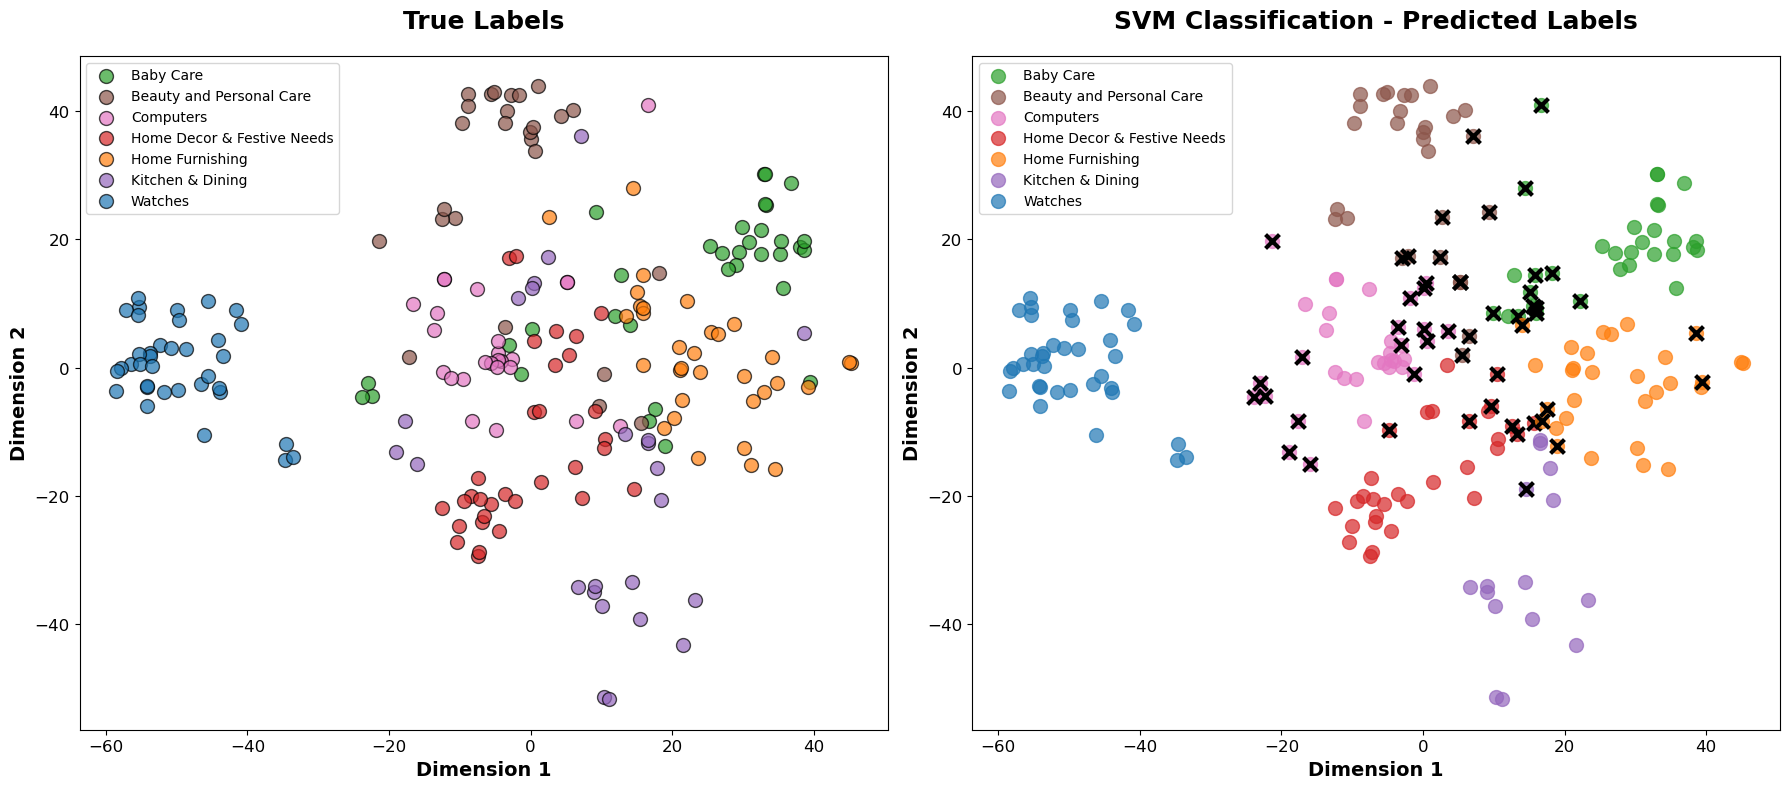

In [31]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()





# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


axes[1].set_title('SVM Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()


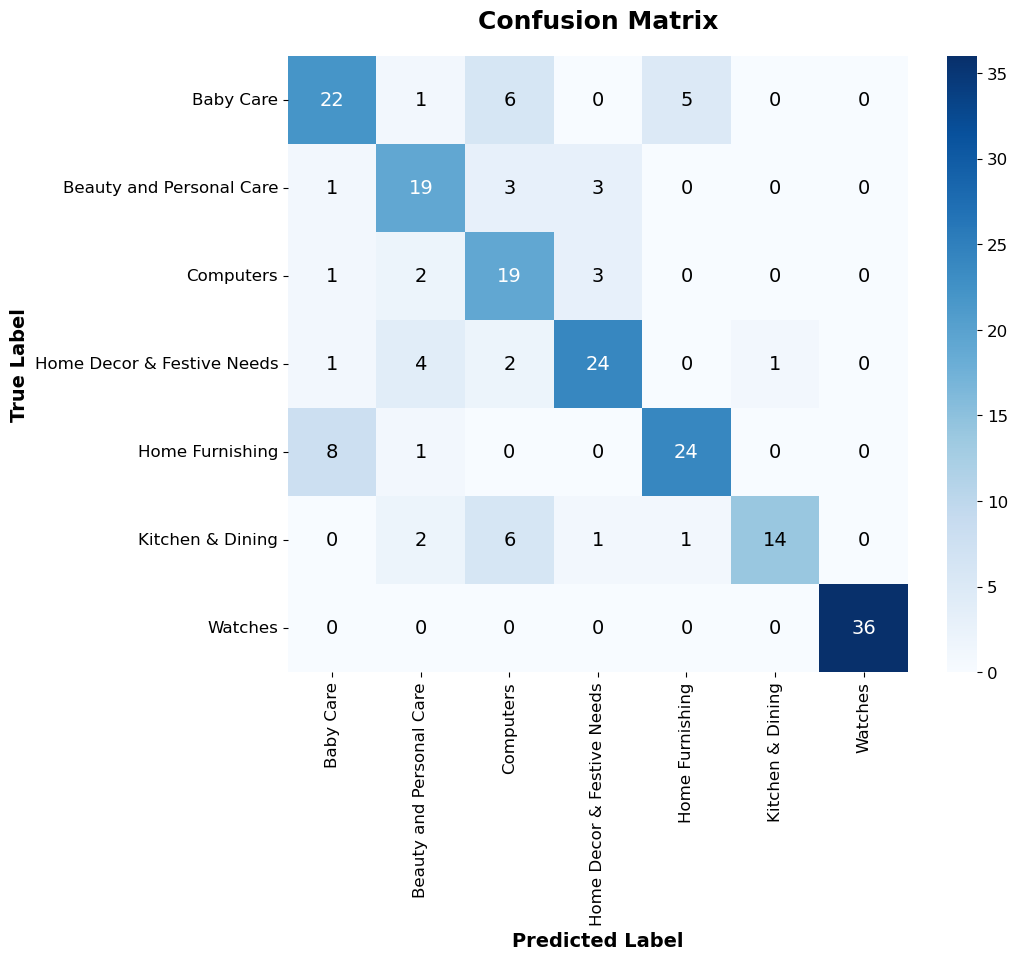

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_test))
# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color=color, fontsize=14)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## COMPARAISON

In [33]:
df_data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       0
top_category                 0
secondary_category           0
tertiary_category            0
clean_description            0
dtype: int64

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import itertools


def compare_dimensionality_reduction(df, X, method, text_representation, type_category, ngram_range=(1, 1)):
    """
    Compare different dimensionality reduction methods and text representations using SVM classification.

    Parameters:
    - df: DataFrame containing the data.
    - X: Text features matrix (TF-IDF or Bag of Words).
    - text_representation: Dimensionality reduction method ('PCA' or 't-SNE').
    - method: Text representation ('TF-IDF', 'BOW', 'bigram', 'trigram', or 'quadrigram').
    - type_category : Type of category ('top_category', 'secondary_category', or 'tertiary_category').
    - ngram_range: Tuple specifying the range of n-grams to use (default is (1, 1) for unigrams (words)).

    Returns:
    - Dictionary containing evaluation metrics for each case.
    """

    results = {}

    # Initialize PCA or t-SNE based on the selected method
    if method == 'PCA':
        n_components = 2
        dimensionality_reducer = PCA(n_components=n_components, random_state=42)
    elif method == 't-SNE':
        n_components = 2
        dimensionality_reducer = TSNE(n_components=n_components, random_state=42)
    else:
        raise ValueError("Invalid method. Choose either 'PCA' or 't-SNE'.")

    # Initialize CountVectorizer based on the text representation
    if text_representation == 'TF-IDF':
        vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    elif text_representation == 'BOW':
        vectorizer = CountVectorizer(ngram_range=ngram_range)
    else:
        raise ValueError("Invalid text_representation. Choose either 'TF-IDF' or 'BOW'.")

    # Transform text data using CountVectorizer
    X_text = vectorizer.fit_transform(df['clean_description'])

    # Concatenate text features with other features if necessary
    if isinstance(X, np.ndarray):
        print(f'COMBINED - {method} - {text_representation} - {type_category}')
        X_combined = X_text.toarray()
    else:
        print('NO COMBINED')
        X_combined = X_text

    # Reduce dimensionality of combined features
    text_features_reduced = dimensionality_reducer.fit_transform(X_combined)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(text_features_reduced, df[type_category], test_size=0.2, random_state=42)

    # Train an SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = svm_classifier.predict(X_test)

    # Compute evaluation metrics
    accuracy = svm_classifier.score(X_test, y_test)
    silhouette_avg = silhouette_score(X_test, y_pred)
    davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
    ari = adjusted_rand_score(y_test, y_pred)

    # Store results
    results['Accuracy'] = accuracy
    results['Silhouette Score'] = silhouette_avg
    results['Davies-Bouldin Index'] = davies_bouldin_idx
    results['Adjusted Rand Index'] = ari
    return results


# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=['Method', 'Representation', 'Type Category', 'Silhouette Score', 'Davies-Bouldin Index', 'Adjusted Rand Index', 'Accuracy'])

# Function to call compare_dimensionality_reduction and append results to the DataFrame
def append_results(method, representation, type_category, results):
    df_results.loc[len(df_results)] = [representation, method, type_category, results['Silhouette Score'], results['Davies-Bouldin Index'], results['Adjusted Rand Index'], results['Accuracy']]

# ==================================================================================================
# GET RESULTS AND APPEND
# ==================================================================================================
type_categories = ['top_category', 'secondary_category', 'tertiary_category', 'product_category_tree']
type_categories = ['top_category']


for type_category in type_categories:
    #PCA + TF-IDF
    results_pca_tfidf = compare_dimensionality_reduction(df_data, X_tfidf.toarray(), 'PCA', 'TF-IDF', type_category)
    append_results('PCA', 'TF-IDF', type_category, results_pca_tfidf)

    # t-SNE + TF-IDF
    results_tsne_tfidf = compare_dimensionality_reduction(df_data, X_tfidf.toarray(), 't-SNE', 'TF-IDF', type_category)
    append_results('t-SNE', 'TF-IDF', type_category, results_tsne_tfidf)

    # PCA + BOW
    results_pca_bow = compare_dimensionality_reduction(df_data, X_bow.toarray(), 'PCA', 'BOW', type_category)
    append_results('PCA', 'BOW', type_category, results_pca_bow)

    # t-SNE + BOW
    results_tsne_bow = compare_dimensionality_reduction(df_data, X_bow.toarray(), 't-SNE', 'BOW', type_category)
    append_results('t-SNE', 'BOW', type_category, results_tsne_bow)

    # PCA + BIGRAM
    results_pca_bow = compare_dimensionality_reduction(df_data, X_bo2gram.toarray(), 'PCA', 'BOW', type_category, (2,2))
    append_results('PCA', 'Bag of Bigram', type_category, results_pca_bow)

    # t-SNE + BIGRAM
    results_tsne_bow = compare_dimensionality_reduction(df_data, X_bo2gram.toarray(), 't-SNE', 'BOW', type_category, (2,2))
    append_results('t-SNE', 'Bag of Bigram', type_category, results_tsne_bow)

    # PCA + TRIGRAM
    results_pca_bow = compare_dimensionality_reduction(df_data, X_bo3gram.toarray(), 'PCA', 'BOW', type_category, (3,3))
    append_results('PCA', 'Bag of Trigram', type_category, results_pca_bow)

    # t-SNE + TRIGRAM
    results_tsne_bow = compare_dimensionality_reduction(df_data, X_bo3gram.toarray(), 't-SNE', 'BOW', type_category, (3,3))
    append_results('t-SNE', 'Bag of Trigram', type_category, results_tsne_bow)

    # PCA + QUADRIGRAM
    results_pca_bow = compare_dimensionality_reduction(df_data, X_bo4gram.toarray(), 'PCA', 'BOW', type_category, (4,4))
    append_results('PCA', 'Bag of Quadrigram', type_category, results_pca_bow)

    # t-SNE + QUADRIGRAM
    results_tsne_bow = compare_dimensionality_reduction(df_data, X_bo4gram.toarray(), 't-SNE', 'BOW', type_category, (4,4))
    append_results('t-SNE', 'Bag of Quadrigram', type_category, results_tsne_bow)

# Order the rows by Adjusted Rand Index in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
display(df_results)

# ==================================================================================================
# DO THE CHOICE BASED ON THE BEST ARI
# ==================================================================================================
# Find the row with the highest ARI
best_ari_row = df_results[df_results['Adjusted Rand Index'] == df_results['Adjusted Rand Index'].max()]

# Print the row with the best ARI
print("\n\nCHOICE :")
display(best_ari_row)


COMBINED - PCA - TF-IDF - top_category
COMBINED - t-SNE - TF-IDF - top_category
COMBINED - PCA - BOW - top_category
COMBINED - t-SNE - BOW - top_category
COMBINED - PCA - BOW - top_category
COMBINED - t-SNE - BOW - top_category
COMBINED - PCA - BOW - top_category
COMBINED - t-SNE - BOW - top_category
COMBINED - PCA - BOW - top_category
COMBINED - t-SNE - BOW - top_category


,Method,Representation,Type Category,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy
3,BOW,t-SNE,top_category,0.41,0.91,0.55,0.75
1,TF-IDF,t-SNE,top_category,0.33,1.16,0.48,0.69
5,Bag of Bigram,t-SNE,top_category,0.37,0.92,0.34,0.58
7,Bag of Trigram,t-SNE,top_category,0.38,0.92,0.27,0.53
2,BOW,PCA,top_category,0.29,1.11,0.23,0.40
4,Bag of Bigram,PCA,top_category,0.23,1.39,0.16,0.39
0,TF-IDF,PCA,top_category,0.34,0.65,0.32,0.38
6,Bag of Trigram,PCA,top_category,0.73,0.96,0.16,0.38
9,Bag of Quadrigram,t-SNE,top_category,0.26,1.43,0.14,0.35
8,Bag of Quadrigram,PCA,top_category,0.87,0.94,0.11,0.32




CHOICE :


,Method,Representation,Type Category,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy
3,BOW,t-SNE,top_category,0.41,0.91,0.55,0.75


# II. Etudier la faisabilité de classification en utilisant des techniques NLP Plus avancées

## II.1. [HERE] WORD EMBEDDING ALGORITHMS (Word2Vec, BERT, Universal Sentence Encoder)

### II.1.1 Word2Vec (CBOW) & PCA 

In [35]:
from gensim.models import Word2Vec

# Train Word2Vec model
sentences = [text.split() for text in df_data['clean_description']]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

# Map text data to Word2Vec embeddings
def text_to_vector(text):
    words = text.split()
    vectors = []
    for word in words:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no word in vocabulary


X_word2vec = np.vstack(df_data['clean_description'].apply(text_to_vector))

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_word2vec)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_data['top_category'], test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_test, y_pred)
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
ari = adjusted_rand_score(y_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")
print("Adjusted Rand Index:", ari)

# Compute accuracy using best mapping
best_accuracy = 0.0
best_mapping = {}
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = np.array([mapping[label] for label in y_pred])
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)


Accuracy: 0.5095238095238095
Silhouette Score: 0.048791058361530304
Davies-Bouldin Index: 2.2099802987195947
Adjusted Rand Index: 0.30080754128102816
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Beauty and Personal Care', 'Computers': 'Computers', 'Home Decor & Festive Needs': 'Home Decor & Festive Needs', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.5095238095238095


C:\Users\Olivi\AppData\Local\Temp\ipykernel_3168\1880368880.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


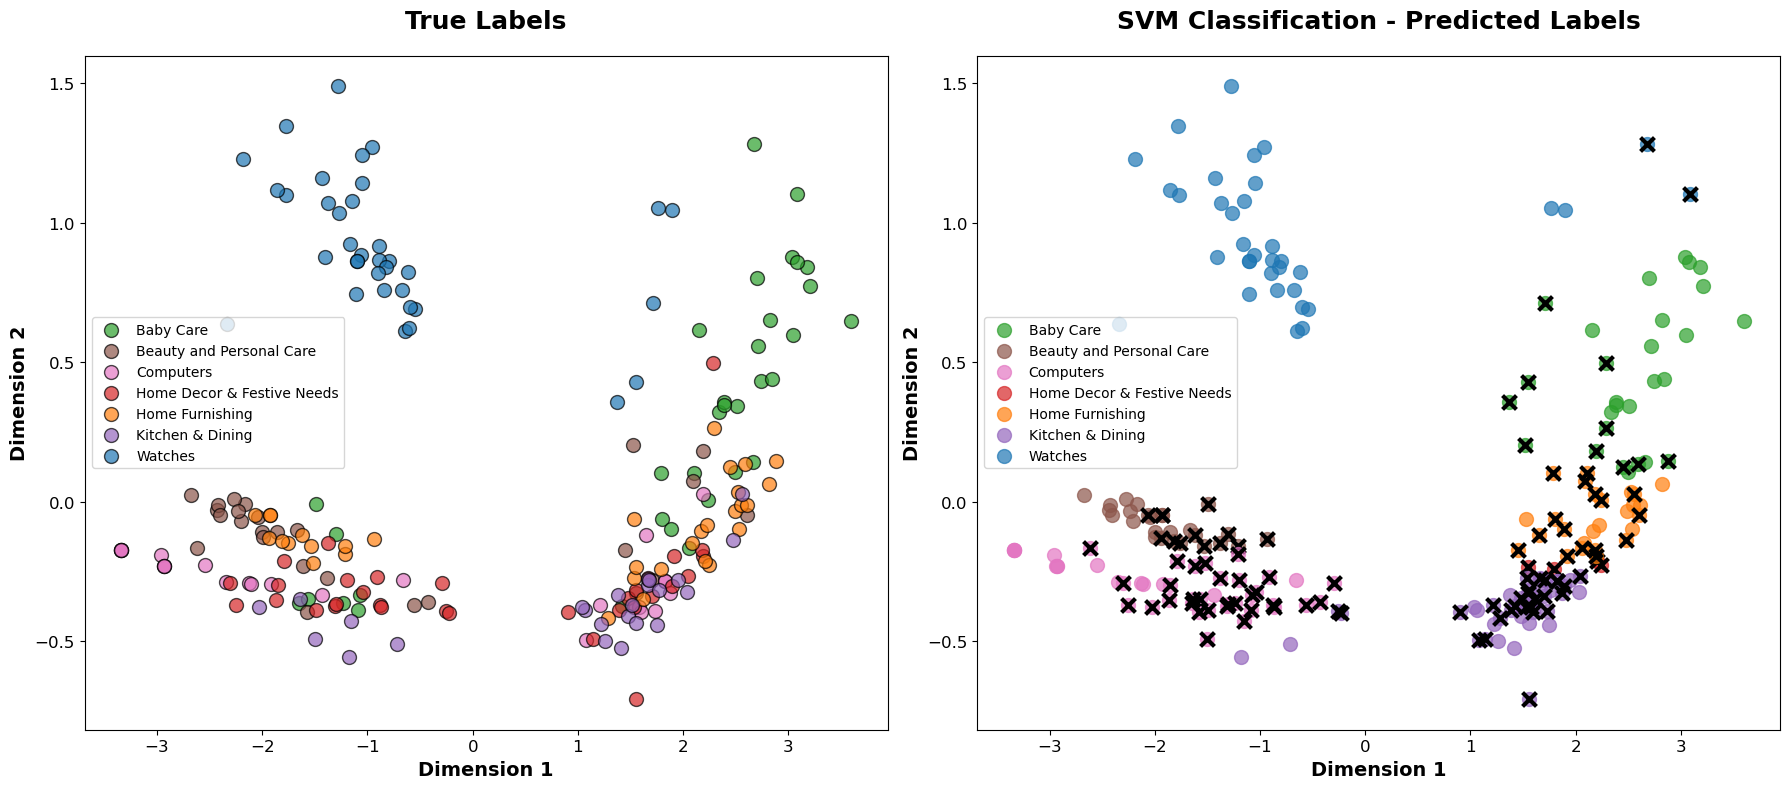

In [36]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


axes[1].set_title('SVM Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()


### II.1.1 Word2Vec (CBOW) & T-SNE

In [37]:
from gensim.models import Word2Vec

# Train Word2Vec model
sentences = [text.split() for text in df_data['clean_description']]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

# Map text data to Word2Vec embeddings
def text_to_vector(text):
    words = text.split()
    vectors = []
    for word in words:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no word in vocabulary


X_word2vec = np.vstack(df_data['clean_description'].apply(text_to_vector))

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_word2vec)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, df_data['top_category'], test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_test, y_pred)
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
ari = adjusted_rand_score(y_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")
print("Adjusted Rand Index:", ari)

# Compute accuracy using best mapping
best_accuracy = 0.0
best_mapping = {}
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = np.array([mapping[label] for label in y_pred])
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)

Accuracy: 0.4380952380952381
Silhouette Score: 0.4096684753894806
Davies-Bouldin Index: 0.7976809747036028
Adjusted Rand Index: 0.23452795568330584
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Computers', 'Computers': 'Beauty and Personal Care', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.45714285714285713


C:\Users\Olivi\AppData\Local\Temp\ipykernel_3168\1880368880.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


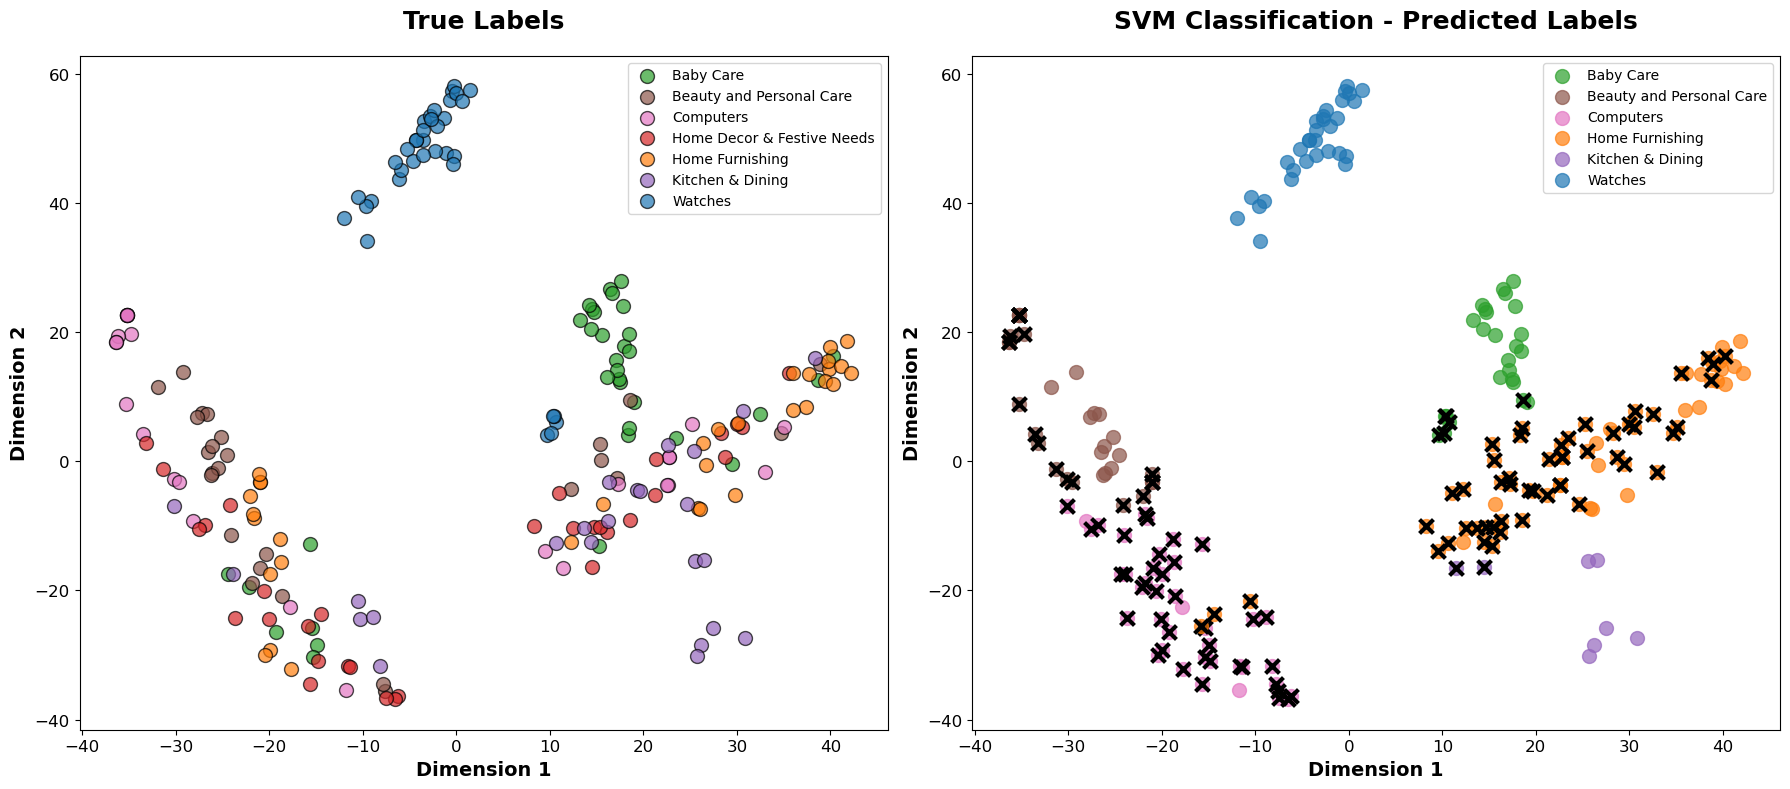

In [38]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


axes[1].set_title('SVM Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()


### II.1.1 Word2Vec (Skip-grams) & T-SNE

In [39]:
from gensim.models import Word2Vec

# Train Word2Vec model
sentences = [text.split() for text in df_data['clean_description']]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1)

# Map text data to Word2Vec embeddings
def text_to_vector(text):
    words = text.split()
    vectors = []
    for word in words:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no word in vocabulary


X_word2vec = np.vstack(df_data['clean_description'].apply(text_to_vector))

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_word2vec)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, df_data['top_category'], test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_test, y_pred)
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
ari = adjusted_rand_score(y_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")
print("Adjusted Rand Index:", ari)

# Compute accuracy using best mapping
best_accuracy = 0.0
best_mapping = {}
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = np.array([mapping[label] for label in y_pred])
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)

Accuracy: 0.6714285714285714
Silhouette Score: 0.292411744594574
Davies-Bouldin Index: 1.4267234628249852
Adjusted Rand Index: 0.4012416502474891
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Beauty and Personal Care', 'Computers': 'Computers', 'Home Decor & Festive Needs': 'Home Decor & Festive Needs', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.6714285714285714


C:\Users\Olivi\AppData\Local\Temp\ipykernel_3168\1880368880.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


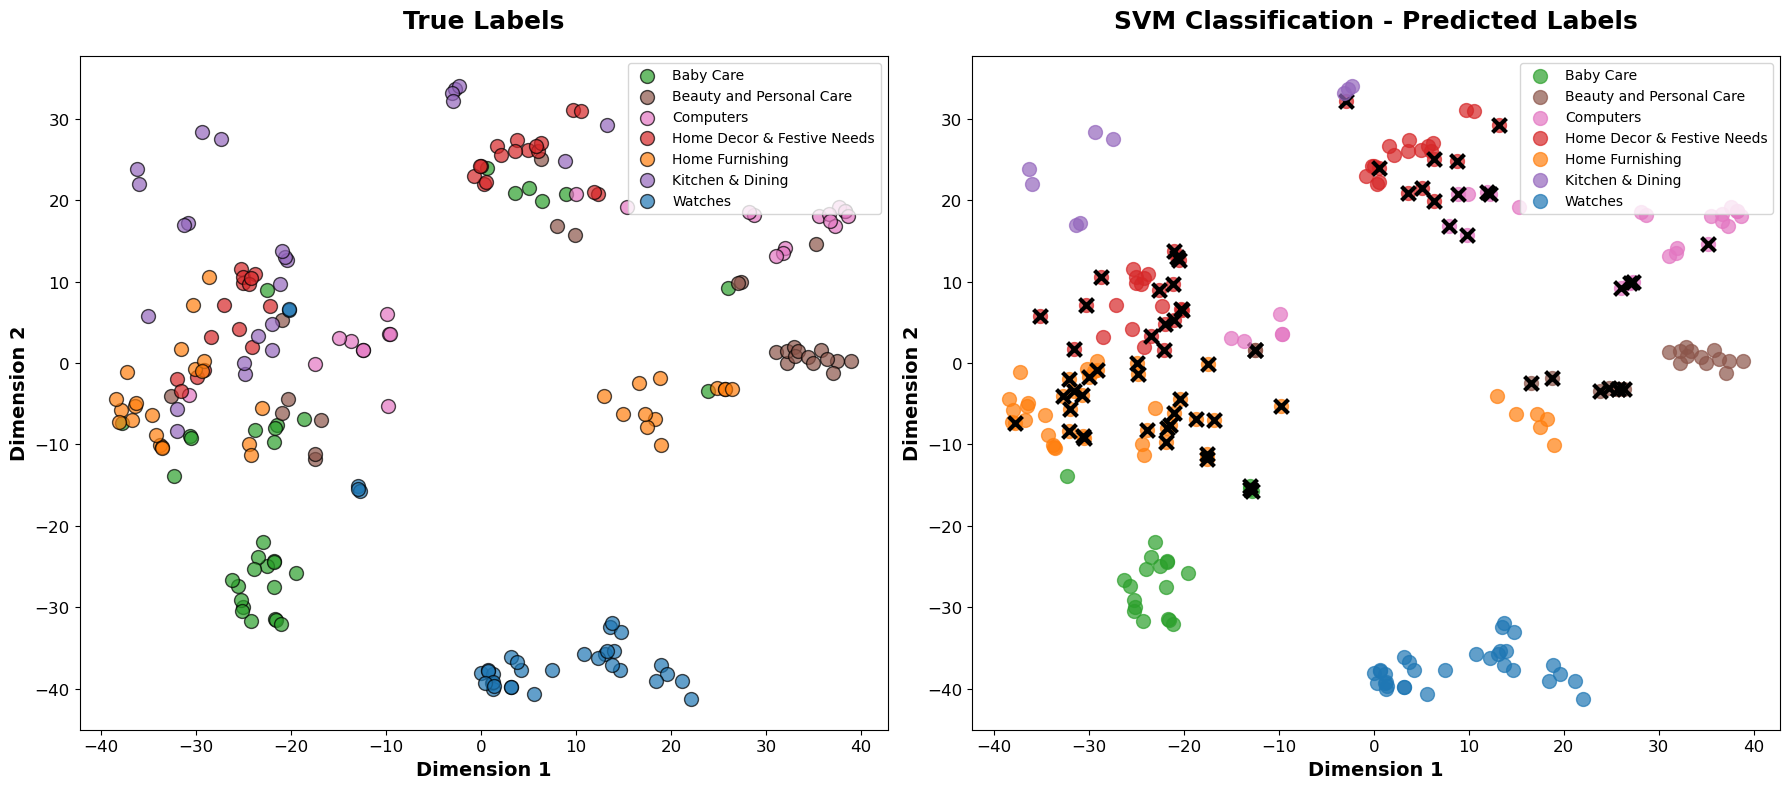

In [40]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


axes[1].set_title('SVM Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()


### II.1.2. BERT & T-SNE

In [41]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode text
def encode_text(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract embeddings from BERT's output
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over tokens
    return embeddings

# Apply encoding to the clean description column
df_data['bert_embeddings'] = df_data['clean_description'].apply(encode_text)


In [42]:
# Convert BERT embeddings to a 2D array using t-SNE
X_bert = np.vstack(df_data['bert_embeddings'])
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_bert)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, df_data['top_category'], test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_test, y_pred)
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
ari = adjusted_rand_score(y_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")
print("Adjusted Rand Index:", ari)

# Compute accuracy using best mapping
best_accuracy = 0.0
best_mapping = {}
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = np.array([mapping[label] for label in y_pred])
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)

Accuracy: 0.5476190476190477
Silhouette Score: 0.39578792452812195
Davies-Bouldin Index: 1.3475292301352368
Adjusted Rand Index: 0.3027543256201793
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Beauty and Personal Care', 'Computers': 'Computers', 'Home Decor & Festive Needs': 'Home Decor & Festive Needs', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.5476190476190477


C:\Users\Olivi\AppData\Local\Temp\ipykernel_3168\1880368880.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


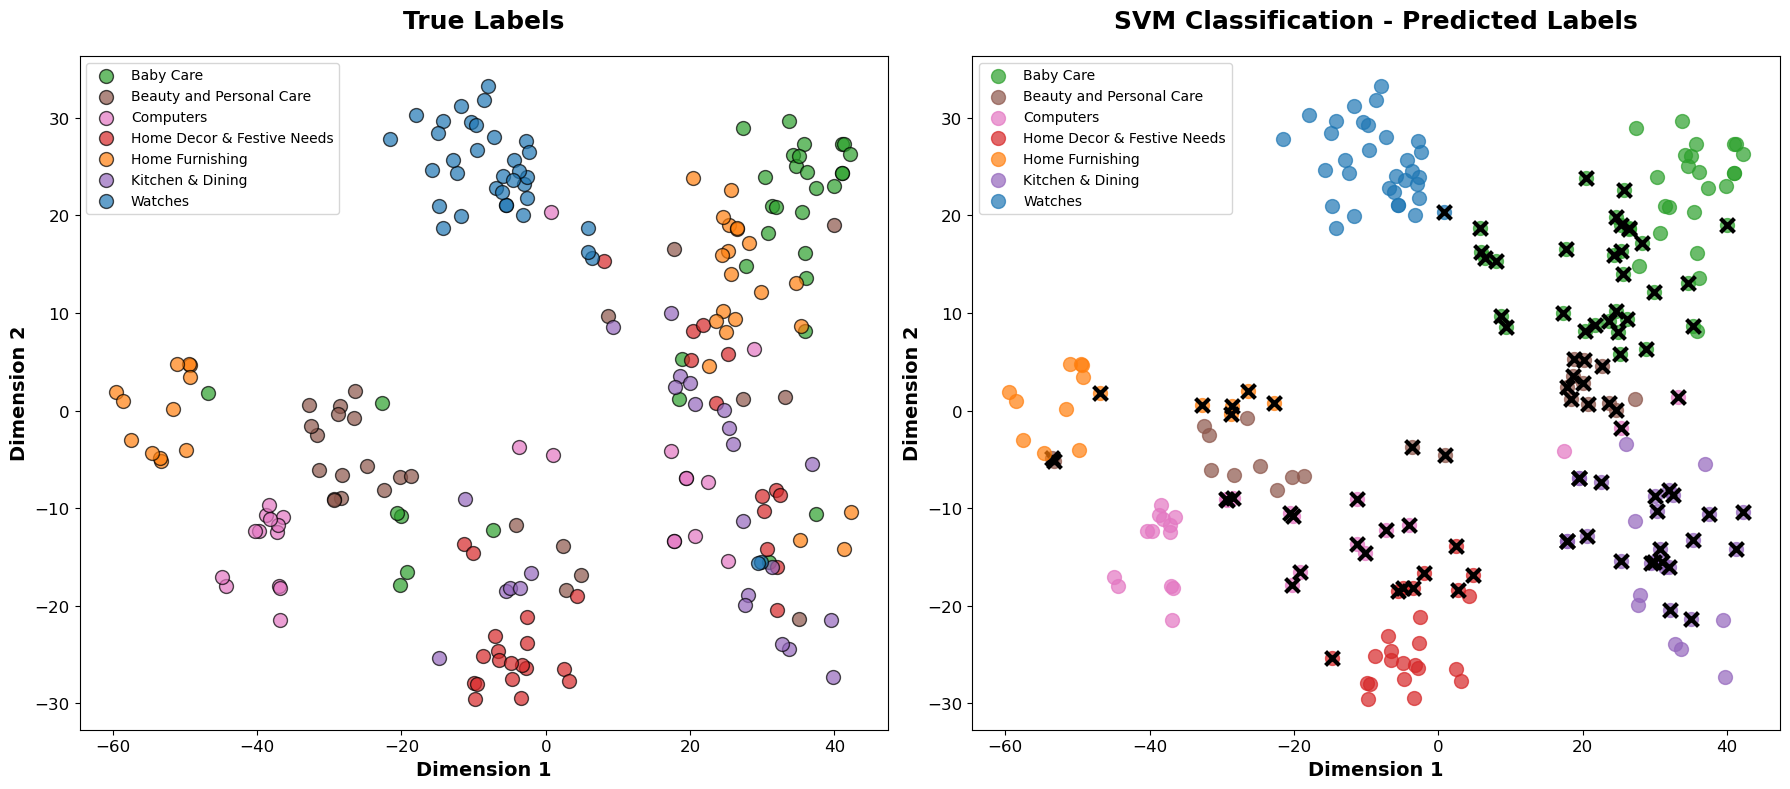

In [43]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


axes[1].set_title('SVM Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()


### II.1.3. UNIVERSAL SENTENCE ENCODER & T-SNE

In [44]:
import tensorflow_hub as hub
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
import numpy as np

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encode text using Universal Sentence Encoder
def encode_text(text):
    embeddings = use_model([text])  # Pass text as a list
    return embeddings.numpy()

# Filter out empty strings and non-string values from the clean_description column
valid_texts = df_data['clean_description'].apply(lambda x: str(x).strip())  # Convert to string and remove leading/trailing whitespace
valid_texts = valid_texts[valid_texts != '']  # Filter out empty strings
valid_indices = valid_texts.index.tolist()  # Get indices of valid texts

# Apply encoding to the valid clean_description texts
df_data.loc[valid_indices, 'use_embeddings'] = valid_texts.apply(encode_text)

In [45]:
# Apply TSNE to reduce dimensionality
X_use = np.vstack(df_data.loc[valid_indices, 'use_embeddings'])
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_use)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, df_data['top_category'], test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Compute evaluation metrics
silhouette_avg = silhouette_score(X_test, y_pred)
davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
ari = adjusted_rand_score(y_test, y_pred)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")
print("Adjusted Rand Index:", ari)

# Compute accuracy using best mapping
best_accuracy = 0.0
best_mapping = {}
for label_combination in itertools.permutations(np.unique(y_pred)):
    mapping = {label: category for label, category in zip(np.unique(y_pred), label_combination)}
    predicted_labels = np.array([mapping[label] for label in y_pred])
    accuracy = np.mean(y_test == predicted_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping: ", best_mapping)
print("Best Accuracy:", best_accuracy)

Accuracy: 0.638095238095238
Silhouette Score: 0.2642548382282257
Davies-Bouldin Index: 1.7612000827457006
Adjusted Rand Index: 0.4275478898187843
Best Mapping:  {'Baby Care': 'Baby Care', 'Beauty and Personal Care': 'Beauty and Personal Care', 'Computers': 'Computers', 'Home Decor & Festive Needs': 'Home Decor & Festive Needs', 'Home Furnishing': 'Home Furnishing', 'Kitchen & Dining': 'Kitchen & Dining', 'Watches': 'Watches'}
Best Accuracy: 0.638095238095238


C:\Users\Olivi\AppData\Local\Temp\ipykernel_3168\1880368880.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


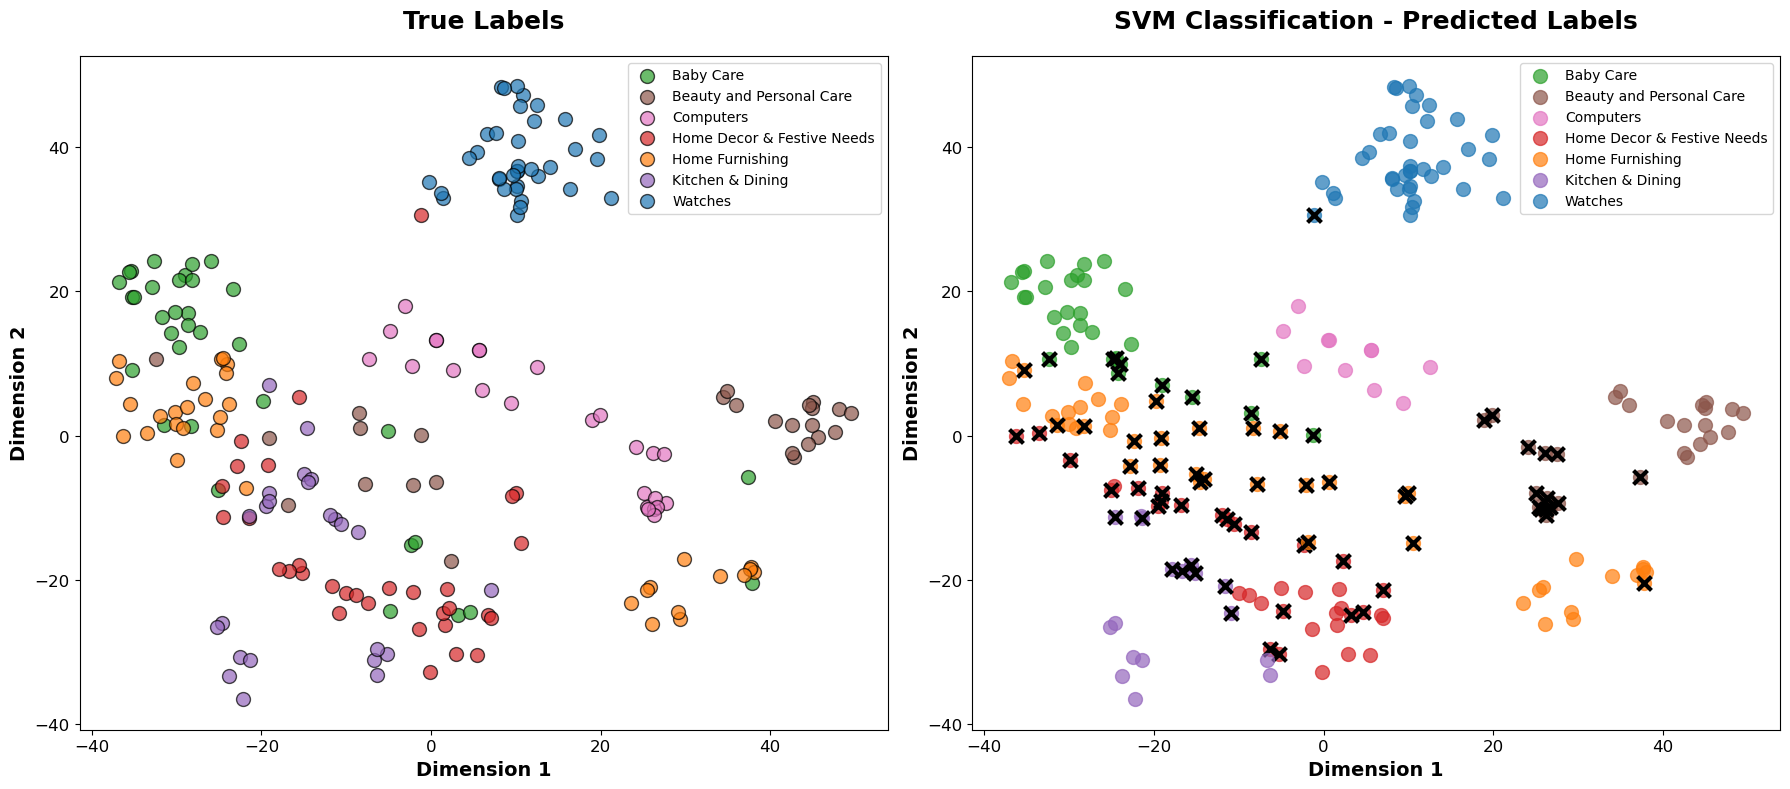

In [46]:
import matplotlib.pyplot as plt

# Define colors for each unique top category manually
top_category_color_dict = {
    'Home Furnishing': '#ff7f0e',              # Orange - #ff7f0e x
    'Baby Care': '#2ca02c',                    # Vert   - #2ca02c 
    'Watches': '#1f77b4',                      # Blue   - #1f77b4 
    'Home Decor & Festive Needs': '#d62728',   # Red    - #d62728 
    'Kitchen & Dining': '#9467bd',             # Purple - #9467bd x
    'Beauty and Personal Care': '#8c564b',     # Brown  - #8c564b
    'Computers': '#e377c2'                     # Pink   - #e377c2 
}

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Define colors for each unique true label
true_label_color_dict = top_category_color_dict

# Scatter plot for true labels
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    axes[0].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=true_label_color_dict[label], marker='o', edgecolors='black', alpha=0.7)

axes[0].set_title('True Labels')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Define colors for each unique predicted label
predicted_label_color_dict = top_category_color_dict

# Scatter plot for predicted labels
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    indices_mismatch = np.where((y_pred == label) & (y_pred != y_test))  # Filter for mismatched predictions
    axes[1].scatter(X_test[indices, 0], X_test[indices, 1], label=label, c=predicted_label_color_dict[label], alpha=0.7)
    axes[1].scatter(X_test[indices_mismatch, 0], X_test[indices_mismatch, 1], c='black', alpha=1, marker='x', edgecolors='black')  # Use red color for mismatches


axes[1].set_title('SVM Classification - Predicted Labels')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()



plt.tight_layout()
plt.show()


## [HERE] COMPARISON 

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import tensorflow_hub as hub

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import tensorflow_hub as hub

def compare_word_embedding_methods(df, type_category, unique_top_categories):
    methods = ['Word2Vec', 'BERT', 'Universal Sentence Encoder']
    representations = ['PCA', 't-SNE']
    results = []

    for method in methods:
        print(f"Processing {method} embeddings...")
        if method == 'Word2Vec':
            # Train Word2Vec model (CBOW)
            sentences = [text.split() for text in df['clean_description']]
            word2vec_model_CBOW = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)
            X_word2vec_CBOW = np.vstack(df['clean_description'].apply(text_to_vector, model=word2vec_model_CBOW))

            # Compute PCA and t-SNE representations for Word2Vec embeddings
            pca = PCA(n_components=2)
            X_pca_word2vec = pca.fit_transform(X_word2vec_CBOW)
            tsne = TSNE(n_components=2, random_state=42)
            X_tsne_word2vec = tsne.fit_transform(X_word2vec_CBOW)

            model = word2vec_model_CBOW
            Xs = {'PCA': X_pca_word2vec, 't-SNE': X_tsne_word2vec}
            
        elif method == 'BERT':
            # Load BERT tokenizer and model
            tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
            bert_model = BertModel.from_pretrained('bert-base-uncased')
            df['bert_embeddings'] = df['clean_description'].apply(lambda x: encode_text_BERT(x, bert_model))
            X_bert = np.vstack(df['bert_embeddings'])

            # Compute PCA and t-SNE representations for BERT embeddings
            pca = PCA(n_components=2)
            X_pca_bert = pca.fit_transform(X_bert)
            tsne = TSNE(n_components=2, random_state=42)
            X_tsne_bert = tsne.fit_transform(X_bert)

            model = bert_model
            Xs = {'PCA': X_pca_bert, 't-SNE': X_tsne_bert}
            
        elif method == 'Universal Sentence Encoder':
            use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
            df['use_embeddings'] = df['clean_description'].apply(lambda x: encode_text_USE(x, use_model))
            X_use = np.vstack(df['use_embeddings'])

            # Compute PCA and t-SNE representations for Universal Sentence Encoder embeddings
            pca = PCA(n_components=2)
            X_pca_use = pca.fit_transform(X_use)
            tsne = TSNE(n_components=2, perplexity=30, random_state=42)
            X_tsne_use = tsne.fit_transform(X_use)

            model = use_model
            Xs = {'PCA': X_pca_use, 't-SNE': X_tsne_use}

        for representation in representations:
            print(f"Processing {representation} representation...")
            X = Xs[representation]

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, df[type_category], test_size=0.2, random_state=42)

            # Evaluate classification performance
            accuracy, silhouette_avg, davies_bouldin_idx, ari = evaluate_classification_performance(X_train, X_test, y_train, y_test)

            results.append([method, representation, type_category, silhouette_avg, davies_bouldin_idx, ari, accuracy])

    # Create DataFrame from results
    df_results = pd.DataFrame(results, columns=['Method', 'Representation', 'Type Category', 'Silhouette Score', 'Davies-Bouldin Index', 'Adjusted Rand Index', 'Accuracy'])

    return df_results


def text_to_vector(text, model):
    words = text.split()
    vectors = []
    for word in words:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no word in vocabulary

def encode_text_BERT(text, model):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract embeddings from BERT's output
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over tokens
    return embeddings
    
def encode_text_USE(text, model):
    # Tokenize the text
    inputs = [text]  # Wrap the text in a list

    # Forward pass through the Universal Sentence Encoder model
    embeddings = model(inputs)  # No need to convert to numpy array, TF-Hub returns numpy arrays
    
    return embeddings

def evaluate_classification_performance(X_train, X_test, y_train, y_test):
    # Train an SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = svm_classifier.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    silhouette_avg = silhouette_score(X_test, y_pred)
    davies_bouldin_idx = davies_bouldin_score(X_test, y_pred)
    ari = adjusted_rand_score(y_test, y_pred)

    return accuracy, silhouette_avg, davies_bouldin_idx, ari

# Call the function with appropriate arguments
unique_top_categories = df_data['top_category'].unique().tolist()
df_results_advanced_TOP = compare_word_embedding_methods(df_data, 'top_category', unique_top_categories)

df_results_advanced_TOP = df_results_advanced_TOP.sort_values(by='Accuracy', ascending=False)
display(df_results_advanced_TOP)


Processing Word2Vec embeddings...
Processing PCA representation...
Processing t-SNE representation...
Processing BERT embeddings...
Processing PCA representation...
Processing t-SNE representation...
Processing Universal Sentence Encoder embeddings...
Processing PCA representation...
Processing t-SNE representation...


,Method,Representation,Type Category,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy
5,Universal Sentence Encoder,t-SNE,top_category,2.64e-01,1.76,0.43,0.64
3,BERT,t-SNE,top_category,3.96e-01,1.35,0.30,0.55
0,Word2Vec,PCA,top_category,-9.37e-03,2.03,0.31,0.52
1,Word2Vec,t-SNE,top_category,3.14e-01,0.92,0.23,0.45
4,Universal Sentence Encoder,PCA,top_category,3.87e-01,0.80,0.24,0.43
2,BERT,PCA,top_category,1.46e-01,1.30,0.12,0.37


In [53]:
df_results_SVM = pd.concat([df_results, df_results_advanced_TOP], axis=0)
df_results_SVM = df_results_SVM.sort_values(by='Accuracy', ascending=False) # Order the rows by Adjusted Rand Index in descending order
display(df_results_SVM)

# Save the concatenated and sorted DataFrame to a CSV file
df_results_SVM.to_csv(r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\RESULTATS\df_results_SVM.csv', index=False)

,Method,Representation,Type Category,Silhouette Score,Davies-Bouldin Index,Adjusted Rand Index,Accuracy
3,BOW,t-SNE,top_category,4.07e-01,0.91,0.55,0.75
1,TF-IDF,t-SNE,top_category,3.31e-01,1.16,0.48,0.69
5,Universal Sentence Encoder,t-SNE,top_category,2.64e-01,1.76,0.43,0.64
5,Bag of Bigram,t-SNE,top_category,3.69e-01,0.92,0.34,0.58
3,BERT,t-SNE,top_category,3.96e-01,1.35,0.30,0.55
7,Bag of Trigram,t-SNE,top_category,3.75e-01,0.92,0.27,0.53
0,Word2Vec,PCA,top_category,-9.37e-03,2.03,0.31,0.52
1,Word2Vec,t-SNE,top_category,3.14e-01,0.92,0.23,0.45
4,Universal Sentence Encoder,PCA,top_category,3.87e-01,0.80,0.24,0.43
2,BOW,PCA,top_category,2.94e-01,1.11,0.23,0.40
